## Final AHP

In [3]:
import numpy as np
import pandas as pd

# Feature names
features = [
    'Years at Company', 'Monthly Income', 'Work-Life Balance',
    'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
    'Distance from Home', 'Education Level', 'Job Level',
    'Company Size', 'Company Tenure', 'Company Reputation',
    'Employee Recognition', 'Overall Sentiment Score'
]

def ahp_feature_weights(pairwise_matrix):
    """
    Compute AHP feature weights and consistency ratio.
    """
    col_sum = pairwise_matrix.sum(axis=0)  # Sum of each column
    normalized_matrix = pairwise_matrix / col_sum  # Normalize matrix

    priority_vector = normalized_matrix.mean(axis=1)  # AHP weights
    priority_vector /= priority_vector.sum()  # Normalize weights

    # Compute Consistency Index (CI) & Consistency Ratio (CR)
    lambda_max = (col_sum @ priority_vector) / priority_vector.sum()
    n = pairwise_matrix.shape[0]
    CI = (lambda_max - n) / (n - 1)

    RI_dict = {1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 
               9: 1.45, 10: 1.49, 11: 1.51, 12: 1.54, 13: 1.56, 14: 1.58}
    
    RI = RI_dict.get(n, 1.58)  # Use default RI if not found
    CR = CI / RI if RI != 0 else 0  

    return priority_vector, CR

# Step 1: Define Pairwise Matrix
pairwise_matrix = np.array([
    [1, 3, 1/3, 1, 2, 3, 2, 4, 1, 2, 3, 5, 4, 3],
    [1/3, 1, 1/5, 1/2, 1, 2, 3, 3, 2, 3, 4, 4, 2, 3],
    [3, 5, 1, 4, 4, 3, 2, 3, 4, 3, 3, 5, 4, 5],
    [1, 2, 1/4, 1, 3, 3, 2, 3, 2, 3, 4, 4, 3, 3],
    [1/2, 1, 1/4, 1/3, 1, 2, 3, 3, 2, 3, 4, 4, 2, 2],
    [1/3, 1/2, 1/3, 1/3, 1/2, 1, 2, 3, 1, 2, 3, 3, 1, 1],
    [1/2, 1/3, 1/2, 1/2, 1/3, 1/2, 1, 2, 1/3, 1, 2, 3, 2, 1],
    [1/4, 1/3, 1/3, 1/3, 1/3, 1/3, 1/2, 1, 1/3, 1/2, 1, 2, 1, 1/2],
    [1, 1/2, 1/4, 1/2, 1/2, 1, 3, 3, 1, 2, 3, 3, 2, 2],
    [1/2, 1/3, 1/3, 1/3, 1/3, 1/2, 1, 2, 1/2, 1, 2, 2, 1, 1],
    [1/3, 1/4, 1/3, 1/4, 1/4, 1/3, 1/2, 1, 1/3, 1/2, 1, 2, 1, 1/2],
    [1/5, 1/4, 1/5, 1/4, 1/4, 1/3, 1/3, 1/2, 1/3, 1/2, 1/2, 1, 1/2, 1/3],
    [1/4, 1/2, 1/4, 1/3, 1/2, 1, 1/2, 1, 1/2, 1, 1, 2, 1, 1/2],
    [1/3, 1/3, 1/5, 1/3, 1/2, 1, 1, 2, 1/2, 1, 1, 3, 2, 1]
])

# Step 2: Calculate AHP Weights
ahp_weights, ahp_CR = ahp_feature_weights(pairwise_matrix)

df_weights = pd.DataFrame({'Feature': features, 'Weight': ahp_weights})
df_weights = df_weights.sort_values(by='Weight', ascending=False)

print("AHP Feature Weights:")
print(df_weights)
print(f"\nConsistency Ratio (CR): {ahp_CR:.4f}")
if ahp_CR < 0.1:
    print("✅ The AHP matrix is consistent.")
else:
    print("⚠️ The AHP matrix is NOT consistent! Consider adjusting the pairwise comparisons.")

# Step 3: Feature Elimination & Impact Analysis
feature_impacts = []

for i in range(len(features)):  
    reduced_matrix = np.delete(np.delete(pairwise_matrix, i, axis=0), i, axis=1)  # Remove feature
    new_weights, _ = ahp_feature_weights(reduced_matrix)  

    new_mean_weight = np.mean(new_weights)  # Mean of new weights
    base_mean_weight = np.mean(ahp_weights)  # Mean of base weights
    impact = abs(base_mean_weight - new_mean_weight)  # Impact Calculation

    feature_impacts.append((features[i], impact))

# Step 4: Sort Features by Impact
feature_impacts.sort(key=lambda x: x[1], reverse=True)

print("\nFeature Importance Based on Impact:")
for feature, impact in feature_impacts:
    print(f"{feature}: Impact = {impact:.4f}")


AHP Feature Weights:
                    Feature    Weight
2         Work-Life Balance  0.201484
3          Job Satisfaction  0.117755
0          Years at Company  0.115611
1            Monthly Income  0.090745
4        Performance Rating  0.088556
8                 Job Level  0.073531
5      Number of Promotions  0.059630
6        Distance from Home  0.050002
13  Overall Sentiment Score  0.044322
9              Company Size  0.042709
12     Employee Recognition  0.035464
7           Education Level  0.030338
10           Company Tenure  0.029568
11       Company Reputation  0.020285

Consistency Ratio (CR): 0.0532
✅ The AHP matrix is consistent.

Feature Importance Based on Impact:
Performance Rating: Impact = 0.0055
Job Level: Impact = 0.0055
Years at Company: Impact = 0.0055
Work-Life Balance: Impact = 0.0055
Job Satisfaction: Impact = 0.0055
Number of Promotions: Impact = 0.0055
Distance from Home: Impact = 0.0055
Education Level: Impact = 0.0055
Company Size: Impact = 0.0055
Compa

## Final ELECTRE

In [5]:
import numpy as np
import pandas as pd

# Define the feature names
features = [
    'Years at Company', 'Monthly Income', 'Work-Life Balance',
    'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
    'Distance from Home', 'Education Level', 'Job Level',
    'Company Size', 'Company Tenure', 'Company Reputation',
    'Employee Recognition', 'Overall Sentiment Score'
]

# Sample feature matrix (Replace this with actual data)
np.random.seed(42)  # For reproducibility
num_samples = 10  # Number of observations
num_features = len(features)

feature_matrix = np.random.rand(num_samples, num_features)  # Random normalized data

def calculate_electre_weights(matrix):
    """Compute ELECTRE weights for a given feature matrix."""
    num_features = matrix.shape[1]
    
    # Normalize the decision matrix
    norm_matrix = matrix / np.linalg.norm(matrix, axis=0)

    # Compute Concordance Matrix
    concordance_matrix = np.zeros((num_features, num_features))
    for i in range(num_features):
        for j in range(num_features):
            concordance_matrix[i, j] = np.sum(norm_matrix[:, i] >= norm_matrix[:, j])

    # Compute Discordance Matrix
    discordance_matrix = np.zeros((num_features, num_features))
    for i in range(num_features):
        for j in range(num_features):
            discordance_matrix[i, j] = np.sum(abs(norm_matrix[:, i] - norm_matrix[:, j]))

    # Compute Concordance & Discordance Dominance Matrices
    concordance_threshold = np.mean(concordance_matrix)
    discordance_threshold = np.mean(discordance_matrix)

    concordance_dominance = (concordance_matrix >= concordance_threshold).astype(int)
    discordance_dominance = (discordance_matrix <= discordance_threshold).astype(int)

    # Compute Final Dominance Matrix
    final_dominance_matrix = concordance_dominance * discordance_dominance

    # Compute Feature Weights
    feature_weights = np.sum(final_dominance_matrix, axis=1) / np.sum(final_dominance_matrix)
    
    return feature_weights

# Compute Original ELECTRE Weights
original_weights = calculate_electre_weights(feature_matrix)

# Store Feature Weights
feature_weights_df = pd.DataFrame({"Feature": features, "Weight": original_weights})
feature_weights_df = feature_weights_df.sort_values(by="Weight", ascending=False)

print("\n🔹 ELECTRE Feature Weights:")
print(feature_weights_df)

# ---------------------------------------------
# 🔥 Feature Elimination & Impact Analysis
# ---------------------------------------------
impact_results = {}

for i, feature in enumerate(features):
    reduced_matrix = np.delete(feature_matrix, i, axis=1)  # Remove one feature
    new_weights = calculate_electre_weights(reduced_matrix)  # Recalculate weights
    
    # Compute Impact (Absolute difference)
    impact = abs(original_weights[i] - np.mean(new_weights))
    impact_results[feature] = impact

# Store Impact Results
impact_df = pd.DataFrame({"Feature": impact_results.keys(), "Impact": impact_results.values()})
impact_df = impact_df.sort_values(by="Impact", ascending=False)

print("\n🔹 Feature Impact Analysis (Higher Impact = More Influence on Outcome):")
print(impact_df)



🔹 ELECTRE Feature Weights:
                    Feature    Weight
3          Job Satisfaction  0.171429
8                 Job Level  0.114286
12     Employee Recognition  0.114286
9              Company Size  0.085714
10           Company Tenure  0.085714
13  Overall Sentiment Score  0.085714
4        Performance Rating  0.057143
5      Number of Promotions  0.057143
7           Education Level  0.057143
11       Company Reputation  0.057143
0          Years at Company  0.028571
1            Monthly Income  0.028571
2         Work-Life Balance  0.028571
6        Distance from Home  0.028571

🔹 Feature Impact Analysis (Higher Impact = More Influence on Outcome):
                    Feature    Impact
3          Job Satisfaction  0.094505
0          Years at Company  0.048352
1            Monthly Income  0.048352
2         Work-Life Balance  0.048352
6        Distance from Home  0.048352
8                 Job Level  0.037363
12     Employee Recognition  0.037363
4        Performance Ratin

## Final Topsis

In [6]:
import numpy as np
import pandas as pd

# Define feature names
features = [
    'Years at Company', 'Monthly Income', 'Work-Life Balance',
    'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
    'Distance from Home', 'Education Level', 'Job Level',
    'Company Size', 'Company Tenure', 'Company Reputation',
    'Employee Recognition', 'Overall Sentiment Score'
]

# Generate sample feature matrix (Replace this with actual data)
np.random.seed(42)
num_samples = 10  # Number of data points
num_features = len(features)

feature_matrix = np.random.rand(num_samples, num_features)  # Random normalized data

def topsis_feature_weights(matrix):
    """Compute TOPSIS feature weights."""
    num_features = matrix.shape[1]

    # Step 1: Normalize the decision matrix
    norm_matrix = matrix / np.sqrt((matrix**2).sum(axis=0))

    # Step 2: Compute the weighted normalized matrix (assuming equal weights)
    weights = np.ones(num_features) / num_features  # Equal weights
    weighted_matrix = norm_matrix * weights

    # Step 3: Determine ideal and anti-ideal solutions
    ideal_solution = np.max(weighted_matrix, axis=0)  # Best values
    anti_ideal_solution = np.min(weighted_matrix, axis=0)  # Worst values

    # Step 4: Compute separation measures
    distance_to_ideal = np.sqrt(((weighted_matrix - ideal_solution) ** 2).sum(axis=0))
    distance_to_anti_ideal = np.sqrt(((weighted_matrix - anti_ideal_solution) ** 2).sum(axis=0))

    # Step 5: Compute TOPSIS scores
    topsis_scores = distance_to_anti_ideal / (distance_to_ideal + distance_to_anti_ideal)

    # Normalize the scores to get feature weights
    feature_weights = topsis_scores / topsis_scores.sum()
    
    return feature_weights

# Compute Original TOPSIS Weights
original_weights = topsis_feature_weights(feature_matrix)

# Store Feature Weights
feature_weights_df = pd.DataFrame({"Feature": features, "Weight": original_weights})
feature_weights_df = feature_weights_df.sort_values(by="Weight", ascending=False)

print("\n🔹 TOPSIS Feature Weights:")
print(feature_weights_df)

# ---------------------------------------------
# 🔥 Feature Elimination & Impact Analysis
# ---------------------------------------------
impact_results = {}

for i, feature in enumerate(features):
    reduced_matrix = np.delete(feature_matrix, i, axis=1)  # Remove one feature
    new_weights = topsis_feature_weights(reduced_matrix)  # Recalculate weights
    
    # Compute Impact (Absolute difference)
    impact = abs(original_weights[i] - np.mean(new_weights))
    impact_results[feature] = impact

# Store Impact Results
impact_df = pd.DataFrame({"Feature": impact_results.keys(), "Impact": impact_results.values()})
impact_df = impact_df.sort_values(by="Impact", ascending=False)

print("\n🔹 Feature Impact Analysis (Higher Impact = More Influence on Outcome):")
print(impact_df)



🔹 TOPSIS Feature Weights:
                    Feature    Weight
3          Job Satisfaction  0.082537
11       Company Reputation  0.081554
6        Distance from Home  0.081208
9              Company Size  0.076123
10           Company Tenure  0.075485
13  Overall Sentiment Score  0.073140
4        Performance Rating  0.070303
1            Monthly Income  0.069860
2         Work-Life Balance  0.069838
7           Education Level  0.068447
0          Years at Company  0.066954
8                 Job Level  0.066841
12     Employee Recognition  0.059952
5      Number of Promotions  0.057758

🔹 Feature Impact Analysis (Higher Impact = More Influence on Outcome):
                    Feature    Impact
5      Number of Promotions  0.019165
12     Employee Recognition  0.016971
8                 Job Level  0.010082
0          Years at Company  0.009969
7           Education Level  0.008476
2         Work-Life Balance  0.007085
1            Monthly Income  0.007063
4        Performance Rating

## Final Weight using formula:
# Final Weight=α×Original Weight+(1−α)×Impact

In [8]:
import pandas as pd

def calculate_final_weights(weights_df, impact_df, alpha=0.5):
    # Merge weights and impact dataframes
    merged_df = weights_df.merge(impact_df, on='Feature', how='left')
    
    # Normalize impact values to 0-1 scale
    merged_df['Impact'] = merged_df['Impact'] / merged_df['Impact'].max()
    
    # Calculate final weight using the formula
    merged_df['Final Weight'] = alpha * merged_df['Weight'] + (1 - alpha) * merged_df['Impact']
    
    return merged_df[['Feature', 'Final Weight']]

# AHP Data
ahp_weights = pd.DataFrame({
    'Feature': ['Work-Life Balance', 'Job Satisfaction', 'Years at Company', 'Monthly Income', 'Performance Rating',
                'Job Level', 'Number of Promotions', 'Distance from Home', 'Overall Sentiment Score', 'Company Size',
                'Employee Recognition', 'Education Level', 'Company Tenure', 'Company Reputation'],
    'Weight': [0.201484, 0.117755, 0.115611, 0.090745, 0.088556, 0.073531, 0.059630, 0.050002,
               0.044322, 0.042709, 0.035464, 0.030338, 0.029568, 0.020285]
})

ahp_impact = pd.DataFrame({
    'Feature': ['Performance Rating', 'Job Level', 'Years at Company', 'Work-Life Balance', 'Job Satisfaction',
                'Number of Promotions', 'Distance from Home', 'Education Level', 'Company Size', 'Company Tenure',
                'Employee Recognition', 'Overall Sentiment Score', 'Company Reputation', 'Monthly Income'],
    'Impact': [0.0055] * 14  # Uniform impact value
})

# ELECTRE Data
electre_weights = pd.DataFrame({
    'Feature': ['Job Satisfaction', 'Job Level', 'Employee Recognition', 'Company Size', 'Company Tenure',
                'Overall Sentiment Score', 'Performance Rating', 'Number of Promotions', 'Education Level',
                'Company Reputation', 'Years at Company', 'Monthly Income', 'Work-Life Balance', 'Distance from Home'],
    'Weight': [0.171429, 0.114286, 0.114286, 0.085714, 0.085714, 0.085714, 0.057143, 0.057143, 0.057143, 0.057143,
               0.028571, 0.028571, 0.028571, 0.028571]
})

electre_impact = pd.DataFrame({
    'Feature': ['Job Satisfaction', 'Years at Company', 'Monthly Income', 'Work-Life Balance', 'Distance from Home',
                'Job Level', 'Employee Recognition', 'Performance Rating', 'Company Reputation', 'Number of Promotions',
                'Education Level', 'Overall Sentiment Score', 'Company Size', 'Company Tenure'],
    'Impact': [0.094505, 0.048352, 0.048352, 0.048352, 0.048352, 0.037363, 0.037363, 0.019780, 0.019780,
               0.019780, 0.019780, 0.008791, 0.008791, 0.008791]
})

# TOPSIS Data
topsis_weights = pd.DataFrame({
    'Feature': ['Job Satisfaction', 'Company Reputation', 'Distance from Home', 'Company Size', 'Company Tenure',
                'Overall Sentiment Score', 'Performance Rating', 'Monthly Income', 'Work-Life Balance', 'Education Level',
                'Years at Company', 'Job Level', 'Employee Recognition', 'Number of Promotions'],
    'Weight': [0.082537, 0.081554, 0.081208, 0.076123, 0.075485, 0.073140, 0.070303, 0.069860, 0.069838,
               0.068447, 0.066954, 0.066841, 0.059952, 0.057758]
})

topsis_impact = pd.DataFrame({
    'Feature': ['Number of Promotions', 'Employee Recognition', 'Job Level', 'Years at Company', 'Education Level',
                'Work-Life Balance', 'Monthly Income', 'Performance Rating', 'Job Satisfaction', 'Company Reputation',
                'Distance from Home', 'Overall Sentiment Score', 'Company Tenure', 'Company Size'],
    'Impact': [0.019165, 0.016971, 0.010082, 0.009969, 0.008476, 0.007085, 0.007063, 0.006620, 0.005614,
               0.004631, 0.004285, 0.003783, 0.001438, 0.000800]
})

# Calculate final weights
final_ahp = calculate_final_weights(ahp_weights, ahp_impact)
final_electre = calculate_final_weights(electre_weights, electre_impact)
final_topsis = calculate_final_weights(topsis_weights, topsis_impact)

# Display final weights
print("Final AHP Weights:")
print(final_ahp)
print("\nFinal ELECTRE Weights:")
print(final_electre)
print("\nFinal TOPSIS Weights:")
print(final_topsis)


Final AHP Weights:
                    Feature  Final Weight
0         Work-Life Balance      0.600742
1          Job Satisfaction      0.558878
2          Years at Company      0.557805
3            Monthly Income      0.545373
4        Performance Rating      0.544278
5                 Job Level      0.536766
6      Number of Promotions      0.529815
7        Distance from Home      0.525001
8   Overall Sentiment Score      0.522161
9              Company Size      0.521354
10     Employee Recognition      0.517732
11          Education Level      0.515169
12           Company Tenure      0.514784
13       Company Reputation      0.510143

Final ELECTRE Weights:
                    Feature  Final Weight
0          Job Satisfaction      0.585715
1                 Job Level      0.254820
2      Employee Recognition      0.254820
3              Company Size      0.089368
4            Company Tenure      0.089368
5   Overall Sentiment Score      0.089368
6        Performance Rating      

In [25]:
import pandas as pd

# Define the feature names and their corresponding weights from AHP, TOPSIS, and ELECTRE
features = [
    "Work-Life Balance", "Job Satisfaction", "Years at Company", "Monthly Income", "Performance Rating",
    "Job Level", "Number of Promotions", "Distance from Home", "Overall Sentiment Score", "Company Size",
    "Employee Recognition", "Education Level", "Company Tenure", "Company Reputation"
]

ahp_weights = [0.600742, 0.558878, 0.557805, 0.545373, 0.544278, 0.536766, 0.529815, 0.525001, 0.522161, 0.521354, 0.517732, 0.515169, 0.514784, 0.510143]
topsis_weights = [0.219761, 0.187733, 0.293560, 0.219198, 0.207862, 0.296452, 0.528879, 0.152396, 0.135266, 0.058933, 0.472736, 0.255356, 0.075259, 0.161596]
electre_weights = [0.270103, 0.585715, 0.270103, 0.270103, 0.133222, 0.254820, 0.133222, 0.270103, 0.089368, 0.089368, 0.254820, 0.133222, 0.089368, 0.133222]

# Create a DataFrame
df = pd.DataFrame({
    "Feature": features,
    "AHP Weight": ahp_weights,
    "TOPSIS Weight": topsis_weights,
    "ELECTRE Weight": electre_weights
})

# Print the table
print(df)

                    Feature  AHP Weight  TOPSIS Weight  ELECTRE Weight
0         Work-Life Balance    0.600742       0.219761        0.270103
1          Job Satisfaction    0.558878       0.187733        0.585715
2          Years at Company    0.557805       0.293560        0.270103
3            Monthly Income    0.545373       0.219198        0.270103
4        Performance Rating    0.544278       0.207862        0.133222
5                 Job Level    0.536766       0.296452        0.254820
6      Number of Promotions    0.529815       0.528879        0.133222
7        Distance from Home    0.525001       0.152396        0.270103
8   Overall Sentiment Score    0.522161       0.135266        0.089368
9              Company Size    0.521354       0.058933        0.089368
10     Employee Recognition    0.517732       0.472736        0.254820
11          Education Level    0.515169       0.255356        0.133222
12           Company Tenure    0.514784       0.075259        0.089368
13    

## Taking Average of all three

In [27]:
import pandas as pd

# Create DataFrame with AHP, TOPSIS, and ELECTRE weights
final_weights_df = pd.DataFrame({
    'Feature': ['Work-Life Balance', 'Job Satisfaction', 'Years at Company', 'Monthly Income', 'Performance Rating',
                'Job Level', 'Number of Promotions', 'Distance from Home', 'Overall Sentiment Score', 'Company Size',
                'Employee Recognition', 'Education Level', 'Company Tenure', 'Company Reputation'],
    'AHP_Weight': [0.600742, 0.558878, 0.557805, 0.545373, 0.544278, 0.536766, 0.529815, 0.525001,
                   0.522161, 0.521354, 0.517732, 0.515169, 0.514784, 0.510143],
    'TOPSIS_Weight': [0.219761, 0.187733, 0.293560, 0.219198, 0.207862, 0.296452, 0.528879, 0.152396,
                      0.135266, 0.058933, 0.472736, 0.255356, 0.075259, 0.161596],
    'ELECTRE_Weight': [0.270103, 0.585715, 0.270103, 0.270103, 0.133222, 0.254820, 0.133222, 0.270103,
                       0.089368, 0.089368, 0.254820, 0.133222, 0.089368, 0.133222]
})

# Calculate the final average weight
final_weights_df['Final_Weight'] = final_weights_df[['AHP_Weight', 'TOPSIS_Weight', 'ELECTRE_Weight']].mean(axis=1)

# Display the final table
print(final_weights_df)


                    Feature  AHP_Weight  TOPSIS_Weight  ELECTRE_Weight  \
0         Work-Life Balance    0.600742       0.219761        0.270103   
1          Job Satisfaction    0.558878       0.187733        0.585715   
2          Years at Company    0.557805       0.293560        0.270103   
3            Monthly Income    0.545373       0.219198        0.270103   
4        Performance Rating    0.544278       0.207862        0.133222   
5                 Job Level    0.536766       0.296452        0.254820   
6      Number of Promotions    0.529815       0.528879        0.133222   
7        Distance from Home    0.525001       0.152396        0.270103   
8   Overall Sentiment Score    0.522161       0.135266        0.089368   
9              Company Size    0.521354       0.058933        0.089368   
10     Employee Recognition    0.517732       0.472736        0.254820   
11          Education Level    0.515169       0.255356        0.133222   
12           Company Tenure    0.51478

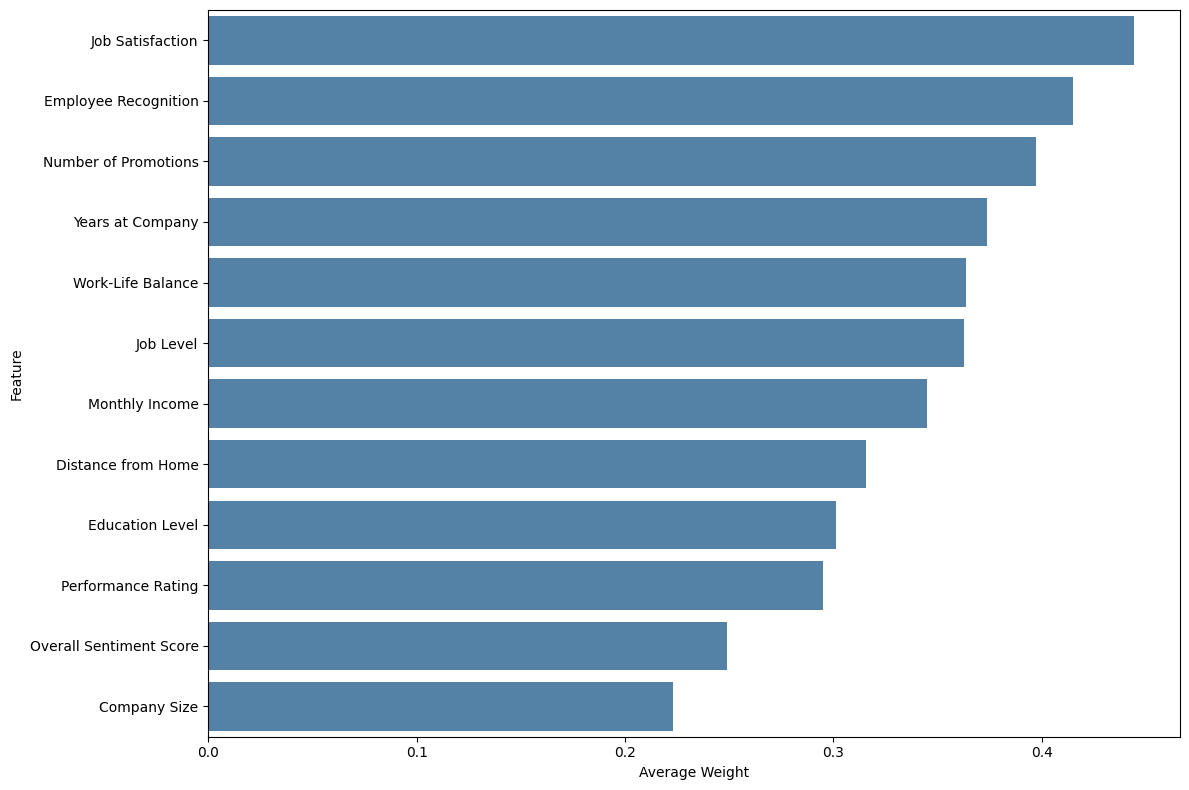

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manually enter the data (from your image)
data = {
    'Feature': [
        'Work-Life Balance', 'Job Satisfaction', 'Years at Company', 'Monthly Income',
        'Performance Rating', 'Job Level', 'Number of Promotions', 'Distance from Home',
        'Overall Sentiment Score', 'Company Size', 'Employee Recognition',
        'Education Level'
    ],
    'Average Weight': [
        0.363535, 0.444109, 0.373823, 0.344891, 0.295121, 0.362679, 0.397305,
        0.315833, 0.248932, 0.223218, 0.415096, 0.301249
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort by average weight
df = df.sort_values(by='Average Weight', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Weight', y='Feature', data=df, color='steelblue')  # single blue color
#plt.title('Feature Importance based on Average Weight', fontsize=16)
plt.xlabel('Average Weight')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
